In [1]:
import numpy as np, prjlib, plottools as pl, tools_y, tools_qrec, pickle, binning as bn
from matplotlib.pyplot import *

In [2]:
def prep_cov(mb,dtype='dr2_smica',mtype=0,cmask='Lmask',ytype='nilc',est='BH'):
    p = prjlib.init_analysis(dtype=dtype,fltr='cinv',wtype=cmask)
    qtau, __, __, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.)
    if est=='BH':
        fxtBH = tools_y.init_cross(qtBH,cy,p.ids,'BH_'+p.stag)
        bh = 'bh-lens-src'
    if est=='bh':
        fxtBH = tools_y.init_cross(qtbh,cy,p.ids,'bh_'+p.stag)
        bh = 'bh-lens'
    if est=='':
        fxtBH = tools_y.init_cross(qtau,cy,p.ids,p.stag)
        bh = 'bh-none'
    mcb, vcb, scb, ocb = bn.binned_spec(mb,fxtBH.xl,cn=1)
    if mtype==0: ymask = 'G60'
    if mtype==1: ymask = 'G50'
    tag = dtype+'_'+cmask+'_'+ytype+'_'+ymask+'_'+bh
    np.savetxt('../v2.1/cl_'+tag+'.dat',np.array((mb.bc,ocb,vcb)).T)
    cov = np.cov(scb[1:,:],rowvar=0)
    np.savetxt('../v2.1/covariance_'+tag+'.dat',cov)
    return ocb, vcb, cov

<ErrorbarContainer object of 3 artists>

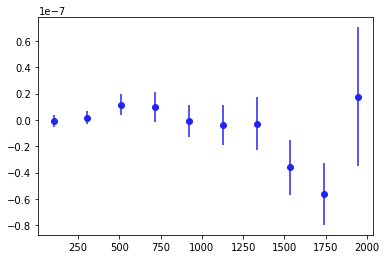

In [3]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
ocb, vcb, cov = prep_cov(mb)
errorbar(mb.bc,mb.bc**2*ocb,yerr=mb.bc**2*vcb,fmt='o')

Plot Correlation Coefficients

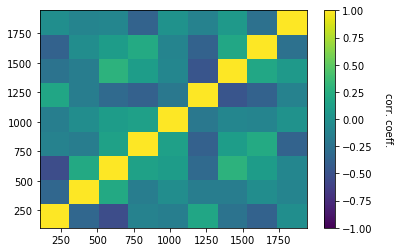

In [4]:
dcov = np.diag(1./np.sqrt(np.diag(cov)))
corr = np.matmul(np.matmul(dcov,cov),dcov)
pl.plot_corr(corr,mb.bc[:10])

Other cases

In [5]:
ocb0, vcb0, cov0 = prep_cov(mb,dtype='dr2_nilc')
ocb1, vcb1, cov1 = prep_cov(mb,ytype='milca')
ocb2, vcb2, cov2 = prep_cov(mb,cmask='G60Lmask')
ocb3, vcb3, cov3 = prep_cov(mb,mtype=1)
ocb4, vcb4, cov4 = prep_cov(mb,est='bh')
ocb5, vcb5, cov5 = prep_cov(mb,est='')

<ErrorbarContainer object of 3 artists>

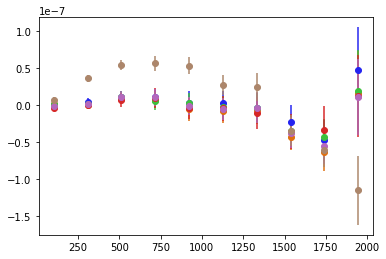

In [6]:
errorbar(mb.bc,mb.bc**2*ocb0,yerr=mb.bc**2*vcb0,fmt='o')
errorbar(mb.bc,mb.bc**2*ocb1,yerr=mb.bc**2*vcb1,fmt='o')
errorbar(mb.bc,mb.bc**2*ocb2,yerr=mb.bc**2*vcb2,fmt='o')
errorbar(mb.bc,mb.bc**2*ocb3,yerr=mb.bc**2*vcb3,fmt='o')
errorbar(mb.bc,mb.bc**2*ocb4,yerr=mb.bc**2*vcb4,fmt='o')
errorbar(mb.bc,mb.bc**2*ocb5,yerr=mb.bc**2*vcb5,fmt='o')

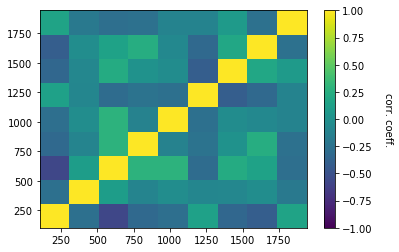

In [7]:
dcov = np.diag(1./np.sqrt(np.diag(cov5)))
corr = np.matmul(np.matmul(dcov,cov5),dcov)
pl.plot_corr(corr,mb.bc[:10])